**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

Data Collection and Processing

In [2]:
data = pd.read_csv("./data/Rainfall.csv")

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,temphigh,temperature,templow,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,temphigh,temperature,templow,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   temphigh                366 non-null    float64
 3   temperature             366 non-null    float64
 4   templow                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
# Remove trailing and leading spaces

data.columns = data.columns.str.strip()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   temphigh       366 non-null    float64
 3   temperature    366 non-null    float64
 4   templow        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
data = data.drop(columns='day')

In [11]:
data

,pressure,temphigh,temperature,templow,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [12]:
# checking the number of missing values
data.isnull().sum()

pressure         0
temphigh         0
temperature      0
templow          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [13]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [14]:
# Handle the missing values

data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0]) 
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [15]:
data.isnull().sum()

pressure         0
temphigh         0
temperature      0
templow          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [16]:
# Replace 'yes' with 1 and 'no' with 0 in data.rainfall

data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})

**Explorative Data Analysis (EDA)**

In [17]:
data.shape

(366, 11)

In [18]:
# Setting the plot style for all plots
sns.set(style='whitegrid')

In [19]:
data.describe()

,pressure,temphigh,temperature,templow,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


When the mean and the median (50%) are close to each other, the values are likely in a normal distribution. However, if they are very different from each other, the distribution is likely skewed.

In [20]:
data.columns

Index(['pressure', 'temphigh', 'temperature', 'templow', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

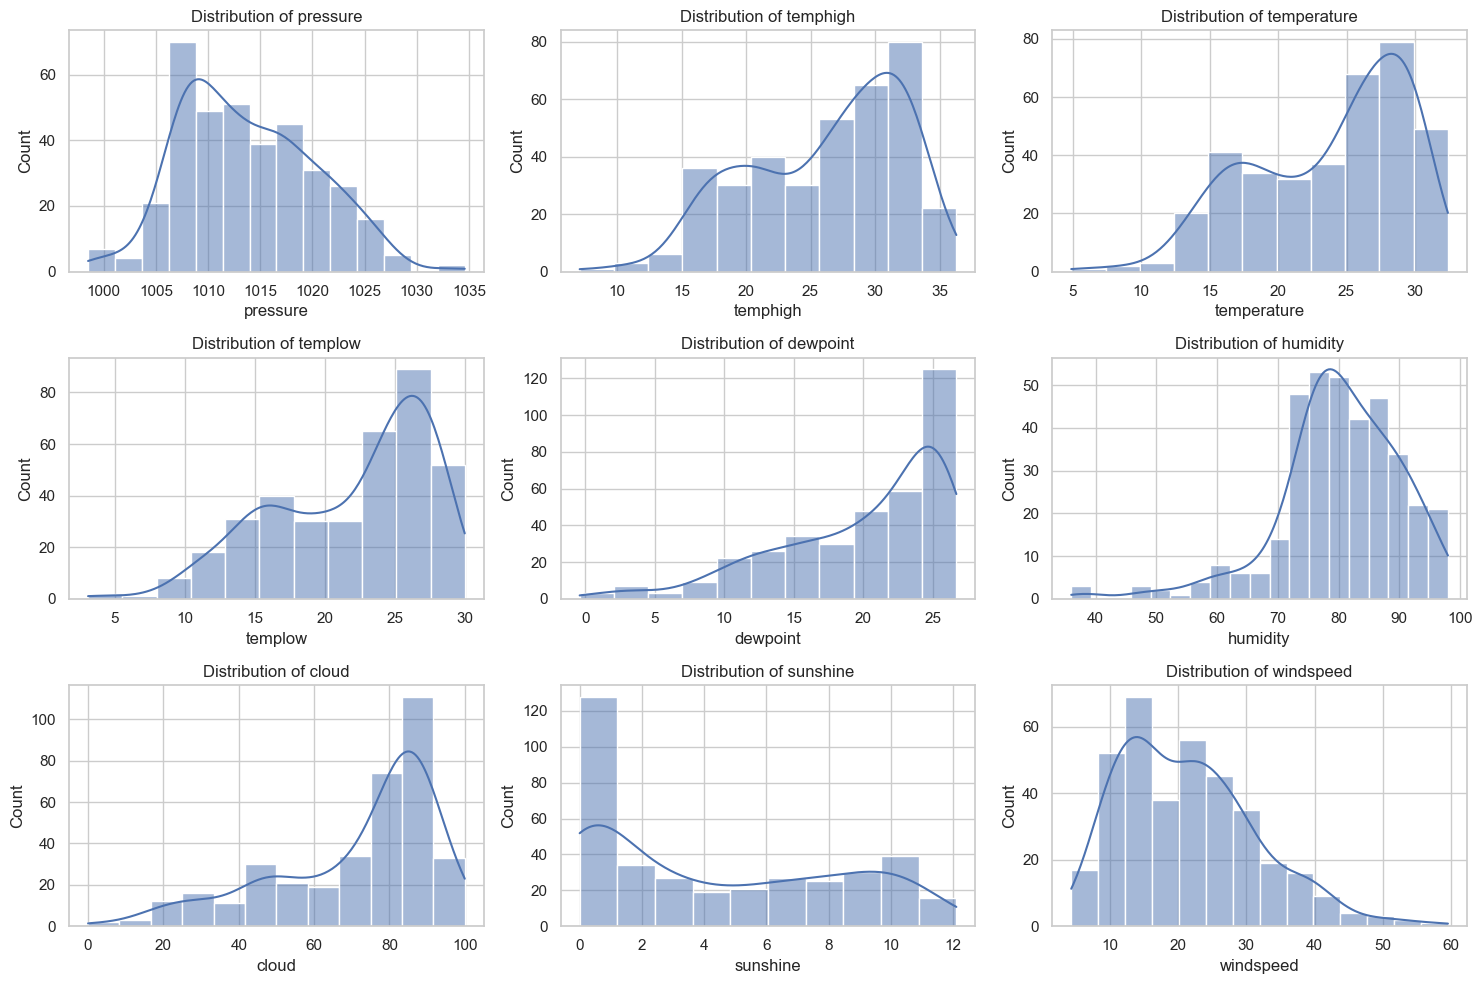

In [21]:
# plot out all the data from the dataframe except for the data in rainfall and winddirection

plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'temphigh', 'temperature', 'templow', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

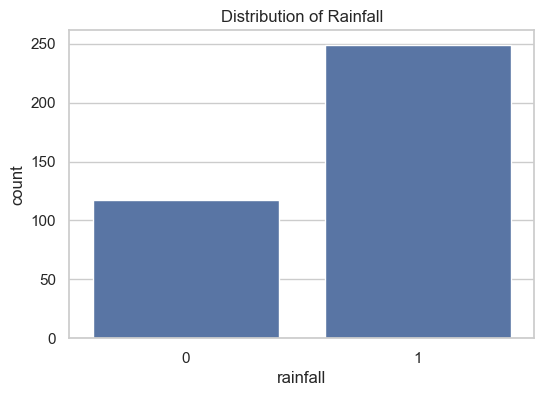

In [22]:
plt.figure(figsize=(6, 4))

sns.countplot(x='rainfall', data=data)
plt.title("Distribution of Rainfall")
plt.show()

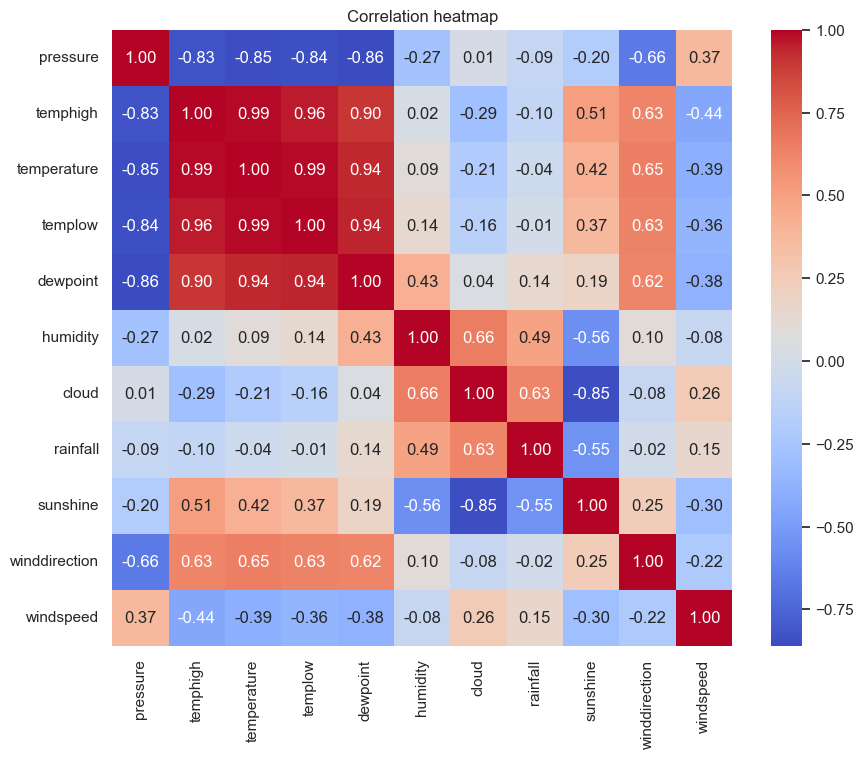

In [23]:
# correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

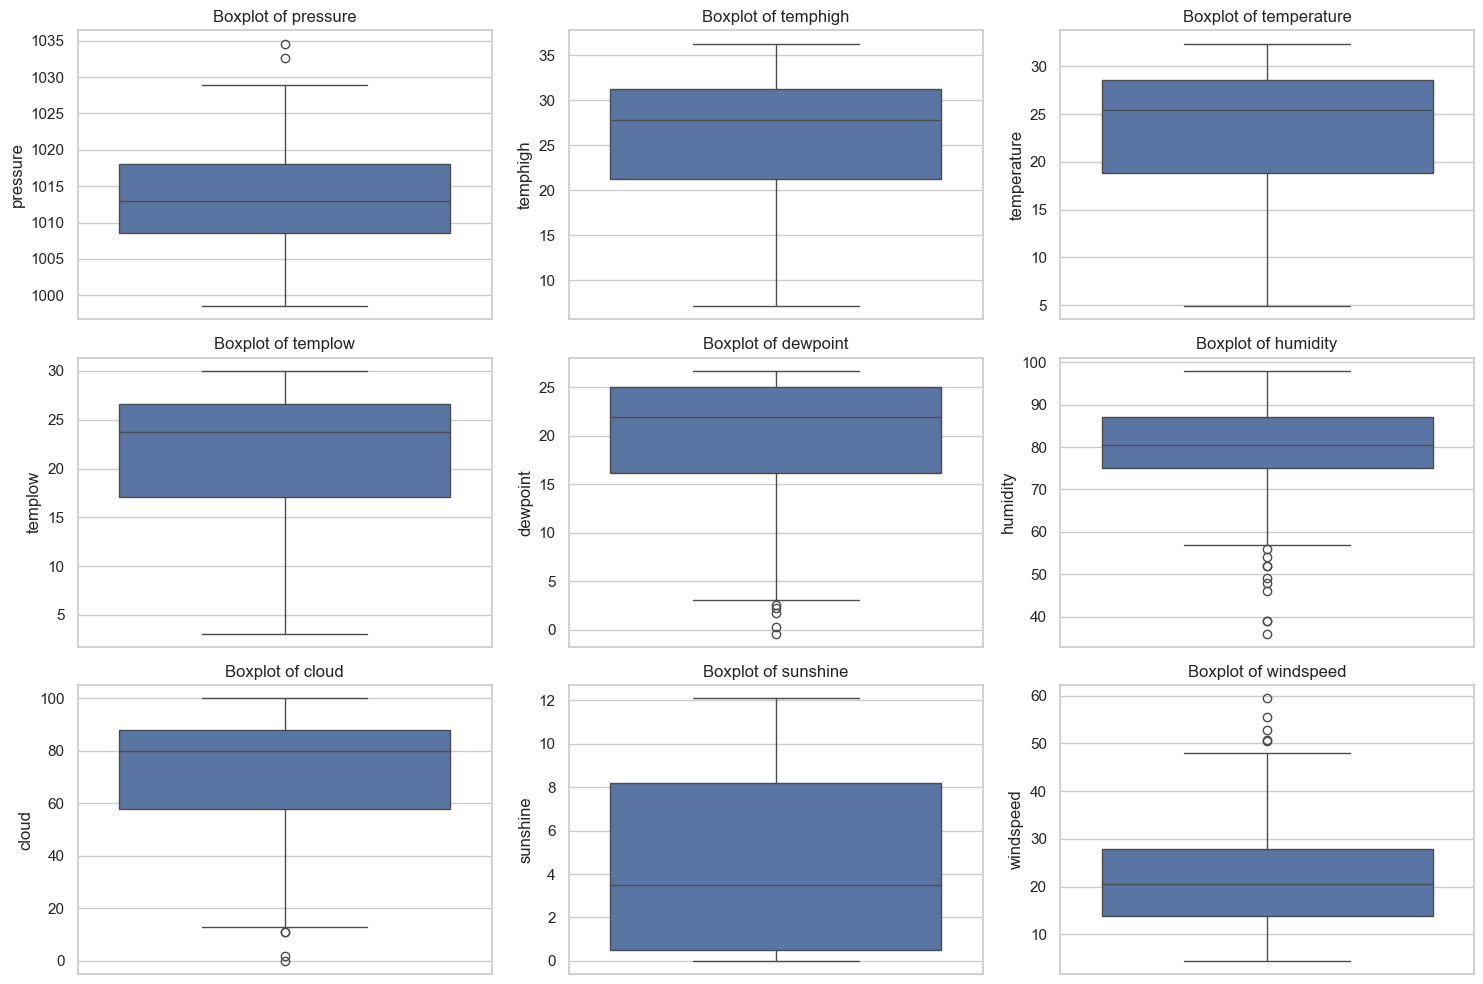

In [24]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'temphigh', 'temperature', 'templow', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [25]:
# Drop the highly correlated columns (but keep one of the columns)

# keep dewpoint because it is the best indicator of rainfall
data = data.drop(columns=['temphigh', 'templow', 'temperature'])

In [26]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [27]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [28]:
# Separate majority and minority class

if data['rainfall'].value_counts()[1] > data['rainfall'].value_counts()[0]:
    df_majority = data[data['rainfall'] == 1]
    df_minority = data[data['rainfall'] == 0]
else:
    df_majority = data[data['rainfall'] == 0]
    df_minority = data[data['rainfall'] == 1]

In [29]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [30]:
# downsample majority class to match minority count

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [31]:
df_majority_downsampled.shape

(117, 8)

In [32]:
df_downsampled = pd.concat(objs=[df_majority_downsampled, df_minority], axis=0)

In [33]:
df_downsampled.shape

(234, 8)

In [34]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [35]:
# shuffling the final dataframe

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [37]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [38]:
# split features and target as x and y respectively

x = df_downsampled.drop(columns = ['rainfall'])
y = df_downsampled['rainfall']

In [39]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5
1,1013.4,19.5,69,17,10.5,70.0,12.4
2,1006.1,24.4,74,27,10.8,220.0,8.7
3,1007.6,24.8,85,84,1.8,70.0,34.8
4,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,5.7,20.0,9.5
230,1010.1,19.9,91,89,0.0,70.0,31.8
231,1020.6,14.7,91,88,0.3,50.0,24.4
232,1008.3,24.1,74,29,5.7,10.0,4.4


In [40]:
# Splitting the data into training data and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Model Training**

In [41]:
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
# Hypertuning the parameters using GridSearch

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=0)

rf_grid_search.fit(x_train, y_train)

/opt/anaconda3/envs/venv/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [43]:
rf_best_model = rf_grid_search.best_estimator_
print("Best parameters for Random Forest: ", rf_grid_search.best_params_, sep='')

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


**Model Evaluation**

In [44]:
cv_scores = cross_val_score(rf_best_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.6969697  0.81818182 0.81818182 0.875      0.90625   ]
Mean cross-validation score: 0.8229166666666667


In [45]:
# test set performance

y_pred = rf_best_model.predict(x_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set accuracy: 0.7323943661971831
Test set Confusion Matrix:
 [[22 10]
 [ 9 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.75      0.77      0.76        39

    accuracy                           0.73        71
   macro avg       0.73      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71



**Predictions on unknown data**

In [46]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [58]:
test_data = (1015.9, 20, 95, 81, 0.0, 40.0, 13.7)
test_df = pd.DataFrame([test_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

In [59]:
prediction = rf_best_model.predict(test_df)
print("Predicted result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Predicted result: Rainfall


In [60]:
# Save model and feature names to a pickle file

model_data = {
    "model": rf_best_model,
    "feature_names": x.columns.tolist()
}

with open("model.pkl", "wb") as file:
    pickle.dump(model_data, file)